# The Letters of Libanius

In [1]:
import pandas as pd
import sqlite3

letter_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Letter_Table.csv")
recipient_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Recipient_Table.csv")
carrier_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Carrier_Table.csv")
translation_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Translation_Table.csv")
type_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Type_Table.csv")
destination_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Destination_Table.csv")
mapping_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Mapping_Table(Letter+Type).csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Pleiades/pleiades-places.csv")

conn = sqlite3.connect(':memory:')

letter_table.to_sql('letter_table',conn,if_exists="replace")
recipient_table.to_sql('recipient_table', conn, if_exists="replace")
carrier_table.to_sql('carrier_table', conn, if_exists="replace")
translation_table.to_sql('translation_table', conn, if_exists="replace")
type_table.to_sql('type_table', conn, if_exists="replace")
destination_table.to_sql('destination_table', conn, if_exists="replace")
mapping_table.to_sql('mapping_table', conn, if_exists="replace")
pleiades.to_sql('pleiades', conn, if_exists="replace")

# Interesting Queries

In [2]:
#Find all the letters sent in 363

pd.read_sql("""
SELECT letter_table.Letter_ID, letter_table.Date_Min, letter_table.Date_Max, letter_table.Destination_ID, 
        recipient_table.Recipient_Name, recipient_table.PLRE_ID, recipient_table.BLZG_ID, 
        carrier_table.Carrier_Name, carrier_table.PLRE_ID, carrier_table.BLZG_ID
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
WHERE (letter_table.Date_Min = "363")
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Date_Min,Date_Max,Destination_ID,Recipient_Name,PLRE_ID,BLZG_ID,Carrier_Name,PLRE_ID,BLZG_ID
0,838,363,363,None,Alexander,Alexander 5,None,None,None,None
1,1124,363,363,Phoenicia,Marius,Marius 1,None,None,None,None
2,1135,363,364,Phoenicia,Marius,Marius 1,None,None,None,None
3,1218,363,363,Phoenicia,Gaianus,Gaianus 6,None,None,None,None
4,1350,363,363,Galatia,Maximus,Maximus 19,None,None,None,None
5,1354,363,363,Galatia,Maximus,Maximus 19,None,None,None,None
6,1357,363,363,Apamea,Marcellinus,None,None,None,None,None
7,1360,363,363,None,Alexander,Alexander 5,None,None,None,None
8,1367,363,363,Constantinople,Modestus,Domitius Modestus 2,None,Julianus,Julianus 14,None
9,1368,363,363,Constantinople,Nicocles,None,None,None,None,None


In [3]:
#What types of letters did he send in 363

pd.read_sql("""
SELECT letter_table.Letter_ID, type_table.Name, type_table.Description
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
    INNER JOIN mapping_table
        ON letter_table.Letter_ID = mapping_table.Letter_ID
    INNER JOIN type_table
        ON mapping_table.Type_ID = type_table.Type_ID
    INNER JOIN translation_table
        ON letter_table.Letter_ID = translation_table.Letter_ID
WHERE (letter_table.Date_Min = "363")
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Name,Description
0,838,School,A letter that deals with issues related to Lib...
1,838,Personal,A letter whose purpose is to maintain his rela...
2,1124,Personal,A letter whose purpose is to maintain his rela...
3,1135,Personal,A letter whose purpose is to maintain his rela...
4,1218,Personal,A letter whose purpose is to maintain his rela...
5,1350,Recommendation,A letter that recommends an individual for a p...
6,1350,Personal,A letter whose purpose is to maintain his rela...
7,1354,Personal,A letter whose purpose is to maintain his rela...
8,1357,Personal,A letter whose purpose is to maintain his rela...
9,1357,Municipal,A letter that deals with issues related to the...


In [4]:
#Find all the letters sent to Phoenicia in chronological order

pd.read_sql("""
SELECT letter_table.Letter_ID, letter_table.Date_Min, letter_table.Date_Max, letter_table.Destination_ID, 
        recipient_table.Recipient_Name, recipient_table.PLRE_ID, recipient_table.BLZG_ID, 
        carrier_table.Carrier_Name, carrier_table.PLRE_ID, carrier_table.BLZG_ID
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
WHERE (letter_table.Destination_ID = "Phoenicia")
ORDER BY letter_table.Date_Min
""", conn)

,Letter_ID,Date_Min,Date_Max,Destination_ID,Recipient_Name,PLRE_ID,BLZG_ID,Carrier_Name,PLRE_ID,BLZG_ID
0,119,357,357,Phoenicia,Gaianus,Gaianus 6,None,Boethus,None,None
1,336,357,357,Phoenicia,Gaianus,Gaianus 6,None,None,None,None
2,156,360,360,Phoenicia,Andronicus,Andronicus 3,None,Auxentius,None,Auxentius v
3,159,360,360,Phoenicia,Andronicus,Andronicus 3,None,None,None,None
4,166,360,360,Phoenicia,Andronicus,Andronicus 3,None,None,None,None
5,175,360,360,Phoenicia,Andronicus,Andronicus 3,None,Bassus,None,Bassus ii
6,799,362,363,Phoenicia,Gaianus,Gaianus 6,None,None,None,None
7,800,362,363,Phoenicia,Gaianus,Gaianus 6,None,None,None,None
8,1124,363,363,Phoenicia,Marius,Marius 1,None,None,None,None
9,1135,363,364,Phoenicia,Marius,Marius 1,None,None,None,None


In [5]:
#Find all the letters sent to Anatolius 3

pd.read_sql("""
SELECT letter_table.Letter_ID, letter_table.Date_Min, letter_table.Date_Max, letter_table.Destination_ID, 
        recipient_table.Recipient_Name, recipient_table.PLRE_ID, recipient_table.BLZG_ID, 
        carrier_table.Carrier_Name, carrier_table.PLRE_ID, carrier_table.BLZG_ID
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
    INNER JOIN mapping_table
        ON letter_table.Letter_ID = mapping_table.Letter_ID
    INNER JOIN type_table
        ON mapping_table.Type_ID = type_table.Type_ID
WHERE (recipient_table.PLRE_ID = "Anatolius 3")
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Date_Min,Date_Max,Destination_ID,Recipient_Name,PLRE_ID,BLZG_ID,Carrier_Name,PLRE_ID,BLZG_ID
0,339,358,359,Sirmium,Anatolius,Anatolius 3,None,None,None,None
1,339,358,359,Sirmium,Anatolius,Anatolius 3,None,None,None,None
2,348,358,358,Sirmium,Anatolius,Anatolius 3,None,None,None,None
3,348,358,358,Sirmium,Anatolius,Anatolius 3,None,None,None,None
4,362,358,358,Sirmium,Anatolius,Anatolius 3,None,None,None,None
5,438,355,356,Milan,Anatolius,Anatolius 3,None,None,None,None
6,512,356,356,Milan,Anatolius,Anatolius 3,None,Spectatus,Spectatus 1,None
7,535,356,356,Milan,Anatolius,Anatolius 3,None,Apolinarius,Apolinarius 1,None
8,549,356,357,Milan,Anatolius,Anatolius 3,None,Sarapodorus,None,None
9,549,356,357,Milan,Anatolius,Anatolius 3,None,Sarapodorus,None,None


In [6]:
#Find all the letters sent to or carried by Domitius Modestus 2

pd.read_sql("""
SELECT letter_table.Letter_ID, letter_table.Date_Min, letter_table.Date_Max, letter_table.Destination_ID, 
        recipient_table.Recipient_Name, recipient_table.PLRE_ID, recipient_table.BLZG_ID, 
        carrier_table.Carrier_Name, carrier_table.PLRE_ID, carrier_table.BLZG_ID
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
    INNER JOIN mapping_table
        ON letter_table.Letter_ID = mapping_table.Letter_ID
    INNER JOIN type_table
        ON mapping_table.Type_ID = type_table.Type_ID
WHERE (recipient_table.PLRE_ID = "Domitius Modestus 2") OR (carrier_table.PLRE_ID = "Domitius Modestus 2")
ORDER BY recipient_table.Recipient_Name
""", conn)

,Letter_ID,Date_Min,Date_Max,Destination_ID,Recipient_Name,PLRE_ID,BLZG_ID,Carrier_Name,PLRE_ID,BLZG_ID
0,583,357,357,Sirmium,Anatolius,Anatolius 3,None,Modestus,Domitius Modestus 2,None
1,242,359,359,None,Modestus,Domitius Modestus 2,None,Strategius,None,None
2,108,359,360,None,Modestus,Domitius Modestus 2,None,None,None,None
3,154,360,360,None,Modestus,Domitius Modestus 2,None,None,None,None
4,154,360,360,None,Modestus,Domitius Modestus 2,None,None,None,None
5,220,360,360,None,Modestus,Domitius Modestus 2,None,None,None,None
6,293,361,361,None,Modestus,Domitius Modestus 2,None,Eusebius and Agroecius,None,Eusebius xi and Agroecius i
7,293,361,361,None,Modestus,Domitius Modestus 2,None,Eusebius and Agroecius,None,Eusebius xi and Agroecius i
8,617,361,361,None,Modestus,Domitius Modestus 2,None,None,None,None
9,804,362,363,Constantinople,Modestus,Domitius Modestus 2,None,Hyperechius,None,None


In [7]:
#Find only the letters of recommendation

pd.read_sql("""
SELECT letter_table.Letter_ID, letter_table.Date_Min, letter_table.Date_Max, letter_table.Destination_ID, 
        recipient_table.Recipient_Name, recipient_table.PLRE_ID, recipient_table.BLZG_ID, 
        carrier_table.Carrier_Name, carrier_table.PLRE_ID, carrier_table.BLZG_ID
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
    INNER JOIN mapping_table
        ON letter_table.Letter_ID = mapping_table.Letter_ID
    INNER JOIN type_table
        ON mapping_table.Type_ID = type_table.Type_ID
WHERE (type_table.Name = "Recommendation")
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Date_Min,Date_Max,Destination_ID,Recipient_Name,PLRE_ID,BLZG_ID,Carrier_Name,PLRE_ID,BLZG_ID
0,40,358,359,Constantinople,Themistius,Themistius 1,None,Julianus,Julianus 14,None
1,75,359,359,Constantinople,Eumolpius,None,None,Parthenius,None,None
2,99,360,360,Constantinople,Themistius,Themistius 1,None,Miccalus,None,None
3,154,360,360,None,Modestus,Domitius Modestus 2,None,None,None,None
4,252,360,361,Constantinople,Themistius,Themistius 1,None,None,None,None
5,339,358,359,Sirmium,Anatolius,Anatolius 3,None,None,None,None
6,348,358,358,Sirmium,Anatolius,Anatolius 3,None,None,None,None
7,482,356,356,Constantinople,Araxius,None,None,Malchus,None,None
8,560,357,357,Constantinople,Andronicus,Andronicus 3,None,Majorinus,None,None
9,563,357,357,Sirmium,Anatolius,Anatolius 3,None,Pelagius,Pelagius 1,None


In [8]:
#If we want to know who translated and commented on the letters of recommendation

pd.read_sql("""
SELECT letter_table.Letter_ID, translation_table.Norman_1992, 
    translation_table.Cabouret_2000, Bradbury_2004, translation_table.Cribiore_2007
FROM letter_table
    LEFT OUTER JOIN recipient_table
        ON letter_table.Recipient_ID = recipient_table.Recipient_ID
    LEFT OUTER JOIN carrier_table
        ON letter_table.Carrier_ID = carrier_table.Carrier_ID
    INNER JOIN mapping_table
        ON letter_table.Letter_ID = mapping_table.Letter_ID
    INNER JOIN type_table
        ON mapping_table.Type_ID = type_table.Type_ID
    INNER JOIN translation_table
        ON letter_table.Letter_ID = translation_table.Letter_ID
WHERE (type_table.Name = "Recommendation")
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Norman_1992,Cabouret_2000,Bradbury_2004,Cribiore_2007
0,40,None,None,B82,None
1,75,None,None,B119,None
2,99,None,None,B83,None
3,154,None,None,B70,None
4,252,None,None,B84,None
5,339,None,None,B62,None
6,348,None,None,B63,None
7,482,None,None,B52,None
8,560,None,None,B87,None
9,563,None,None,B59,None


# Mapping the Letters

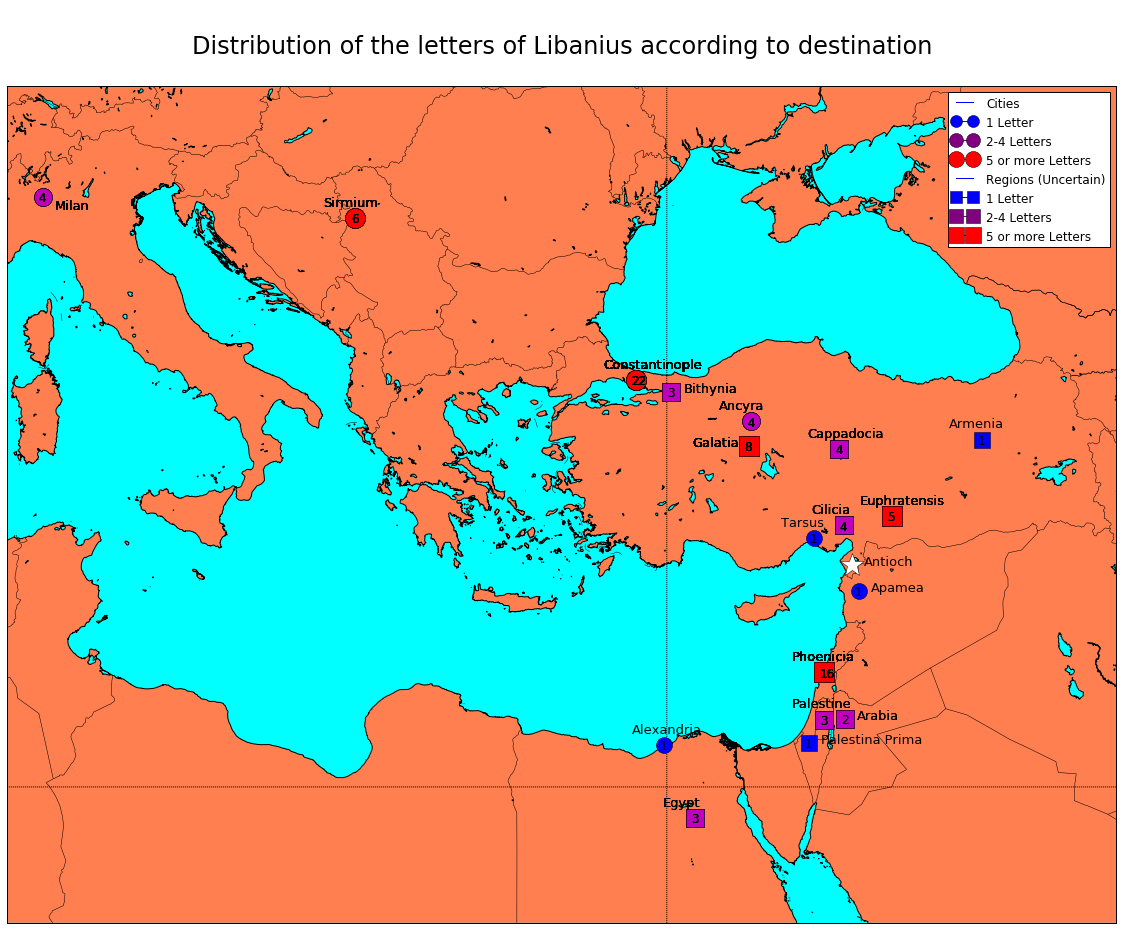

In [9]:
destinations = pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, destination_table.Type, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination_ID = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY letter_table.Letter_ID
""", conn)

destinations['Total'] = destinations.groupby(['Destination_ID'])['Destination_ID'].transform('count')


from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(20,15))
    
libanius_basemap = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=8, llcrnrlat=26,
    urcrnrlon=45, urcrnrlat=48)

 
libanius_basemap.drawcoastlines()
libanius_basemap.drawcountries()
libanius_basemap.fillcontinents(color='coral', lake_color='aqua')
libanius_basemap.drawmapboundary(fill_color='aqua')

libanius_basemap.drawmeridians(np.arange(0, 360, 30))
libanius_basemap.drawparallels(np.arange(-90, 90, 30))

x,y = libanius_basemap(destinations['reprLong'].values, destinations['reprLat'].values)
labels = destinations['Destination_ID']
frequencies = destinations['Total']
type = destinations['Type']

for label, xpt, ypt in zip(labels, x, y):
    if label == "Bithynia":
        plt.text(xpt+45000, ypt, label, fontsize=13)
    elif label == "Arabia":
        plt.text(xpt+45000, ypt, label, fontsize=13)
    elif label == "Palestina Prima":
        plt.text(xpt+45000, ypt, label, fontsize=13)
    elif label == "Milan":
        plt.text(xpt+45000, ypt-45000, label, fontsize=13)  
    elif label == "Galatia":
        plt.text(xpt-210000, ypt, label, fontsize=13)
    elif label == "Apamea":
        plt.text(xpt+45000, ypt, label, fontsize=13)    
    else:
        plt.text(xpt-120000, ypt+45000, label, fontsize=13)

for frequency, xpt, ypt in zip(frequencies, x, y):
    plt.text(xpt-15000, ypt-15000, frequency, fontsize=12)

for f, t, x, y in zip(frequencies, type, x, y):
    if t == "City":
        if f > 0 and f < 2:
            libanius_basemap.plot(x, y, marker='o', color='b', markersize=16)
        elif f >= 2 and f < 5:
            libanius_basemap.plot(x, y, marker='o',color='m', markersize=18)
        else:
            libanius_basemap.plot(x, y, marker='o',color='r', markersize=20)
    if t == "Region":
        if f > 0 and f < 2:
            libanius_basemap.plot(x, y, marker='s', color='b', markersize=16)
        elif f >= 2 and f < 5:
            libanius_basemap.plot(x, y, marker='s',color='m', markersize=18)
        else:
            libanius_basemap.plot(x, y, marker='s',color='r', markersize=20)

lat2 = 36.20138
lon2 = 36.161749
x,y = libanius_basemap(lon2,lat2)
label = "Antioch"
libanius_basemap.plot(x, y, marker='*',color='w', markersize=25)
plt.text(x+45000, y, label, fontsize=13)       
            
title_line = mlines.Line2D([], [], label='Cities')
blue_line = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='1 Letter')
purple_line = mlines.Line2D([], [], color='purple', marker='o', markersize=14, label='2-4 Letters')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=16, label='5 or more Letters')
region_line = mlines.Line2D([], [], label='Regions (Uncertain)')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=12, label='1 Letter')
purple_square = mlines.Line2D([], [], color='purple', marker='s', markersize=14, label='2-4 Letters')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=16, label='5 or more Letters')
plt.legend(handles=[title_line, blue_line, purple_line, red_line, region_line, blue_square, purple_square, red_square])

plt.title("\nDistribution of the letters of Libanius according to destination\n", fontsize=24) 
plt.show()

# Making a more visually appealing and interactive map

In [10]:
import folium

libanius_letters = folium.Map(location=[35, 22], zoom_start=4,tiles='http://{s}.tile.openstreetmap.se/hydda/base/{z}/{x}/{y}.png',
                   attr='Tiles courtesy of <a href="http://openstreetmap.se/" target="_blank">OpenStreetMap Sweden</a> &mdash; Map data &copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>')

galatia_geo = '.\Maps\map_Galatia.geojson'
egypt_geo = '.\Maps\map_Egypt2.geojson'
cappadocia_geo = '.\Maps\map_Cappadocia.geojson'
bithynia_geo = '.\Maps\map_Bithynia3.geojson'
armenia_geo = '.\Maps\map_Armenia.geojson'
cilicia_geo = '.\Maps\map_Cilicia.geojson'
euphratensis_geo = '.\Maps\map_Euphratensis.geojson'
palestine_geo = '.\Maps\map_Palestine.geojson'
phoenicia_geo = '.\Maps\map_Phoenicia2.geojson'
arabia_geo = '.\Maps\map_Arabia.geojson'

libanius_letters.choropleth(geo_path=galatia_geo, fill_color="#FF0000", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=egypt_geo, fill_color="#CC00FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=cappadocia_geo, fill_color="#CC00FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=bithynia_geo, fill_color="#CC00FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=armenia_geo, fill_color="#0000FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=cilicia_geo, fill_color="#CC00FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=euphratensis_geo, fill_color="#FF0000", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=palestine_geo, fill_color="#CC00FF", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=phoenicia_geo, fill_color="#FF0000", fill_opacity=0.8)
libanius_letters.choropleth(geo_path=arabia_geo, fill_color="#CC00FF", fill_opacity=0.8)

for index, row in destinations.iterrows():
    if row["Type"] == "City":
        if row["Total"] == 1:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", 1 Letter : F" + str(row["Letter_ID"]), 
                      icon = folium.Icon(icon = 'pushpin', color ='blue')).add_to(libanius_letters)
        elif row["Total"] >= 2 and row["Total"] < 5:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'pushpin', color ='purple')).add_to(libanius_letters)
        else:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'pushpin', color ='red')).add_to(libanius_letters)
    if row["Type"] == "Region":        
        if row["Total"] > 0 and row["Total"] < 2:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", 1 Letter : F" + str(row["Letter_ID"]), 
                      icon = folium.Icon(icon = 'question-sign', color ='blue')).add_to(libanius_letters)
        elif row["Total"] >= 2 and row["Total"] < 5:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'question-sign', color ='purple')).add_to(libanius_letters)
        else:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'question-sign', color ='red')).add_to(libanius_letters)
            
folium.Marker([36.20138, 36.161749], popup="Antioch, Home of Libanius and Origin of the Letters",icon = folium.Icon(icon = 'fullscreen', color ='green')).add_to(libanius_letters)

libanius_letters

# Making a Choropleth Map

In [11]:
destinations_choropleth = pd.read_sql("""
SELECT destination_table.Destination_ID
FROM letter_table, destination_table
WHERE (letter_table.Destination_ID = destination_table.Destination_ID)
    AND (destination_table.type = "Region")
ORDER BY destination_table.Destination_ID
""", conn)

destinations_choropleth['Total'] = destinations_choropleth.groupby(['Destination_ID'])['Destination_ID'].transform('count')

import folium
import pandas as pd

destinations_choropleth.to_csv('Choropleth\destinations_choropleth.csv')

provinces_geo = 'Choropleth\map_provinces.geojson'
provinces_letters = 'Choropleth\destinations_choropleth.csv'

provinces_data = pd.read_csv(provinces_letters)

libanius_letters3 = folium.Map(location=[35, 22], zoom_start=4,tiles='http://{s}.tile.openstreetmap.se/hydda/base/{z}/{x}/{y}.png',
                   attr='Tiles courtesy of <a href="http://openstreetmap.se/" target="_blank">OpenStreetMap Sweden</a> &mdash; Map data &copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>')

libanius_letters3.choropleth(geo_path=provinces_geo,
                             data_out='data1.json',
                             data=provinces_data,
                             columns=['Destination_ID', 'Total'],
                             key_on='feature.properties.name',
                             threshold_scale=[0, 2, 4, 6, 8, 16],
                             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
                             legend_name="Number of Letters per Province")

for index, row in destinations.iterrows():
    if row["Type"] == "City":
        if row["Total"] == 1:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", 1 Letter : F" + str(row["Letter_ID"]), 
                      icon = folium.Icon(icon = 'pushpin', color ='blue')).add_to(libanius_letters3)
        elif row["Total"] >= 2 and row["Total"] < 5:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'pushpin', color ='purple')).add_to(libanius_letters3)
        else:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'pushpin', color ='red')).add_to(libanius_letters3)
    if row["Type"] == "Region":        
        if row["Total"] > 0 and row["Total"] < 2:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", 1 Letter : F" + str(row["Letter_ID"]), 
                      icon = folium.Icon(icon = 'question-sign', color ='blue')).add_to(libanius_letters3)
        elif row["Total"] >= 2 and row["Total"] < 5:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'question-sign', color ='purple')).add_to(libanius_letters3)
        else:
            folium.Marker([row["reprLat"], row["reprLong"]], popup=row["Destination_ID"]+ ", " + str(row["Total"]) + " Letters", 
                      icon = folium.Icon(icon = 'question-sign', color ='red')).add_to(libanius_letters3)

folium.Marker([36.20138, 36.161749], popup="Antioch, Home of Libanius and Origin of the Letters",icon = folium.Icon(icon = 'fullscreen', color ='green')).add_to(libanius_letters3)


libanius_letters3